In [1]:
from PIL import Image
# import imagehash
import cv2
import numpy as np
import math
import os
import json
import time
# import bs4
import requests
from seleniumbase import SB
from tqdm import tqdm
from datasets import load_dataset
from transformers import AutoImageProcessor, AutoModelForImageClassification, pipeline, AutoModel,  AutoProcessor, AutoModelForZeroShotImageClassification
from timm.data.transforms_factory import create_transform
import torch
from torch import nn
from torchvision.transforms import transforms
from torch.nn.functional import cosine_similarity
import datasets
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

/home/hicham/miniconda3/envs/phd/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


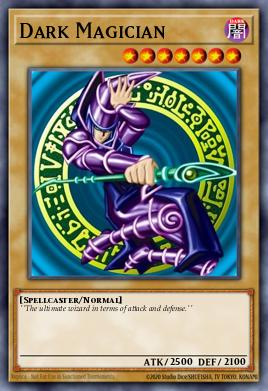

In [55]:
image = Image.open("./datasets/ygoprodeck/Dark-Magician-0-46986414/46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
image

In [65]:
image = cv2.imread("/home/hicham/Documents/draw2-training/datasets/cardmarket/4-Starred-Ladybug-of-Doom-83994646/PSV-580576.jpg")
image = cv2.resize(image, (268, 391), interpolation=cv2.INTER_LINEAR)
# image = image[350:360, 60:200]
cv2.imshow("", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
[np.mean(image[:, :, 0]), np.mean(image[:, :, 1]), np.mean(image[:, :, 2])]

[80.34142857142857, 80.80357142857143, 238.22642857142858]

In [66]:
ref = [0, 0, 250]

In [67]:
distances = np.linalg.norm(image - ref, axis=2)
dist_norm = (distances / distances.max() * 255).astype(np.uint8)

In [68]:
mask = dist_norm <= 20

In [69]:
sum(sum(mask))

4983

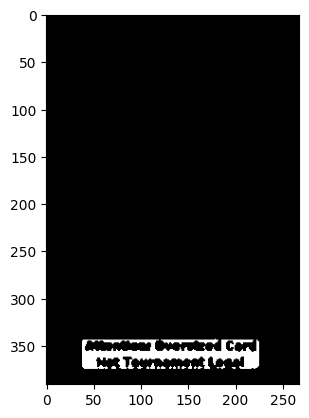

In [50]:
plt.imshow(mask, cmap='gray')

In [35]:
math.dist(ref, image)

ValueError: both points must have the same number of dimensions

In [42]:
math.dist(ref, [np.mean(image[:, :, 0]), np.mean(image[:, :, 1]), np.mean(image[:, :, 2])])

0.5730631754538247

In [63]:
hash = imagehash.average_hash(image)

In [61]:
otherimage = Image.open("./datasets/Zouloux/Dark-Magician-0-46986414/DUSA-FR100-46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
otherhash = imagehash.average_hash(otherimage)

In [64]:
print(hash - otherhash)

6


In [78]:
image = Image.open("./datasets/ygoprodeck/Dark-Magician-0-46986414/46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
hash = imagehash.average_hash(image, 32)
phash = imagehash.phash(image, 32)
otherimage = Image.open("./datasets/Zouloux/Dark-Magician-0-46986414/DUSA-FR100-46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
otherhash = imagehash.average_hash(otherimage, 32)
otherphash = imagehash.phash(otherimage, 32)
(hash - otherhash) + (phash - otherphash)

322

In [79]:
image = Image.open("./datasets/ygoprodeck/Dark-Magician-0-46986414/46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
hash = imagehash.average_hash(image, 32)
phash = imagehash.phash(image, 32)
otherimage = Image.open("./datasets/Zouloux/Dark-Magician-2-46986414/LEDD-FRA01-46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
otherhash = imagehash.average_hash(otherimage, 32)
otherphash = imagehash.phash(otherimage, 32)
(hash - otherhash) + (phash - otherphash)

632

In [34]:
subdirs, dirs, files = next(iter(os.walk("datasets/cardmarket/")))

In [39]:
dir1 = dirs[3]
dir2 = dirs[4]

In [43]:
"-".join(dir2.split("-")[:-2])

'Burning-Soul'

In [45]:
name = next(iter(os.listdir("datasets/cardmarket/Dark-Magician-0-46986414")))

In [47]:
input_path = "./card_sets_augmented.json"

with open(input_path, "rb") as f:
    card_sets = json.load(f)

In [49]:
name.split('-')[0]

'SYE'

In [54]:
card_sets['Dark-Magician-0-46986414']

['CT13-FR003',
 'CT14-FR001',
 '25TH-FR001',
 'BPT-001',
 'BPT-007',
 'DB1-FR102',
 'DLG1-FR004',
 'DUPO-FR101',
 'DTP1-FR002',
 'DTP1-FR002',
 'DT01-FR002',
 'DL11-FR001',
 'DPBC-FR008',
 'DPYG-FR001',
 'DUSA-FR100',
 'FL1-FR002',
 'GFTP-FR128',
 '2021-FR001',
 'LOB-005',
 'LOB-E003',
 'LOB-FR005',
 'LC01-FR005',
 'LCYW-FR001',
 'LDK2-FRY10',
 'LEDD-FRA01',
 'MAGO-FR002',
 'RA03-FR080',
 'RA03-FR080',
 'RA04-FR001',
 'RA04-FR001',
 'RA04-FR001',
 'RA04-FR001',
 'RA04-FR001',
 'RA04-FR001',
 'RA04-FR001',
 'RP01-FR003',
 'JUMP-FR049',
 'SS01-FRA01',
 'SS04-FRA01',
 'STP1-FR001',
 'SBCB-FR001',
 'SBCB-FR001',
 'SDY-006',
 'SDY-E005',
 'SYE-001',
 'YSYR-FR001',
 'YSYR-FR001',
 'SD6-FR003',
 'SDMY-FR010',
 'JMPS-FR003',
 'DDS-002',
 'PCY-004',
 'PCY-E004',
 'MVP1-FR054',
 'MVP1-FRS54',
 'MVP1-FRSV3',
 'MVP1-FRSE3',
 'MVP1-FRG54',
 'MVP1-FRGV3',
 'YGLD-FRA03',
 'YGLD-FRC09']

In [57]:
card_sets['Dark-Magician-0-46986414'][-17].startswith(name.split('-')[0])

True

In [61]:
yes = False
for i, expansion in enumerate(card_sets['Dark-Magician-0-46986414']):
    yes = yes or expansion.startswith(name.split('-')[0])
yes

True

In [75]:
name = "Shooting-Star-Dragon-T.G.-EX-0-63180841"
name = "-".join(name.split("-")[:-2])

In [76]:
name

'Shooting-Star-Dragon-T.G.-EX'

In [77]:
name = name.replace('"', '').replace("'", "")
name = name.replace('---', '-').replace(".", "").replace(',', '').replace("'", "")
name

'Shooting-Star-Dragon-TG-EX'

In [25]:
name = "Ash-Blossom-Joyous-Spring-0-46986414"
with SB(uc=True, headless=False) as sb:
    search_string = "-".join(name.split("-")[:-2])
    search_string = search_string.replace('"', '').replace("'", "")
    search_string = search_string.replace('---', '-').replace(".", "").replace(',', '').replace("'", "")
    sb.open(f"https://www.cardmarket.com/en/YuGiOh/Cards/{search_string}/Versions")
    # sb.wait_for_element("select", timeout=10)
    time.sleep(3)

    if sb.is_element_visible('button[class="btn btn-outline-primary"]'):
        sb.click('button[class="btn btn-outline-primary"]')
        time.sleep(3)

        scroll_pause = 1  # seconds to wait after each scroll
        scroll_step = 1000  # pixels to scroll each time (you can tweak this)

        # Get initial height
        total_height = sb.driver.execute_script("return document.body.scrollHeight")
        current_position = 0

        while current_position < total_height:
            sb.driver.execute_script(f"window.scrollTo(0, {current_position});")
            time.sleep(scroll_pause)  # Wait for images to lazy load
            current_position += scroll_step

            # Recalculate in case content was added dynamically
            total_height = sb.driver.execute_script("return document.body.scrollHeight")

        # Finally scroll to bottom to be safe
        sb.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)

        # Now you can get everything
    page = sb.get_page_source()
    # soup = bs4.BeautifulSoup(page, features="lxml")


start error

X11 display failed! Will use regular xvfb!


In [21]:
f"https://www.cardmarket.com/en/YuGiOh/Cards/{search_string}/Versions"

'https://www.cardmarket.com/en/YuGiOh/Cards/Ash-Blossom-Joyous-Spring/Versions'

In [24]:
page

'<html lang="en-US" dir="ltr"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,"Segoe UI",Roboto,"Helvetica Neue",Arial,"Noto Sans",sans-serif,"Apple Color Emoji","Segoe UI Emoji","Segoe UI Symbol","Noto Color Emoji"}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;padding-left:1.5rem;max-width:60rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{line-height:2.25rem;font-size:1.5rem;font-weight:500}@media (width <= 720px){.h2{line-height:1.5rem;font-size:1.25rem}}#challenge-error-text{background-image:url("");background-repeat:no-repeat;

In [150]:
img_html_tags = soup.find_all('div', {"class": "image card-image is-yugioh is-sharp"})

src = []
for i, tag in enumerate(img_html_tags):
    src.append(tag.find('img').attrs['src'])

'/img/transparent.gif' in src

False

In [146]:
src

['https://product-images.s3.cardmarket.com/5/RA04/821153/821153.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/821152/821152.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/821151/821151.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/821150/821150.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/821149/821149.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820968/820968.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820967/820967.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820966/820966.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820965/820965.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820964/820964.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820695/820695.jpg',
 'https://product-images.s3.cardmarket.com/5/QCAC/813537/813537.jpg',
 '/img/transparent.gif',
 '/img/transparent.gif',
 '/img/transparent.gif',
 '/img/transparent.gif',
 '/img/transparent.gif',
 '/img/transparent.gif',
 '/img/tra

In [109]:
img_html_tags[0].find('img').attrs['src']

'https://product-images.s3.cardmarket.com/5/RA04/821153/821153.jpg'

In [8]:
from scrapping import format_search

format_search("Ash-Blossom-&-Joyous-Spring-0-14558127")

'Ash-Blossom--Joyous-Spring-0-14558127'

In [29]:
with open("cardinfo.json", "rb") as f:
    cardinfo = json.load(f)

with open("wrong_format.bckp.json", "rb") as f:
    wrong_format = json.load(f)

In [30]:
for data in cardinfo["data"]:
    name = f"{data["name"].replace(" ", "-")}-0-{str(data["id"])}"
    if name in wrong_format:
        wrong_format[name] = data["name"].replace("-", "").replace(" ", "-")

In [31]:
with open("right_format.json", "w") as json_file:
    json.dump(wrong_format, json_file)

In [28]:
for data in cardinfo["data"]:
    name = f"{data["name"].replace(" ", "-")}-0-{str(data["id"])}"
    if name == "Thousand-Eyes-Idol-0-27125110":
        print(True)
        break
    # if name in wrong_format:
    #     wrong_format[name] = data["name"].replace("-", "").replace(" ", "-")

True


In [3]:
ygoprodeck = os.listdir("./datasets/ygoprodeck")
zouloux = os.listdir("./datasets/Zouloux")

In [12]:
with open("card_sets_augmented.json", "rb") as f:
    card_sets = json.load(f)

In [13]:
folders = []
for folder in ygoprodeck:
    if folder not in zouloux and folder.split("-")[-2] != "0" and folder in card_sets.keys():
        folders.append(folder)

In [15]:
folders

['Number-34:-Terror-Byte-1-32003338',
 'Black-Rose-Dragon-1-73580471',
 'Dark-Magician-8-46986414',
 'Familiar-Possessed---Aussa-1-31887905',
 'Offerings-to-the-Doomed-1-19230408',
 'Dark-Magician-Girl-the-Dragon-Knight-1-43892408',
 'Gemini-Elf-1-69140098',
 'Celtic-Guardian-2-91152256',
 'Familiar-Possessed---Hiita-1-4376658',
 'Dark-Magician-3-46986414',
 'Gyakutenno-Megami-1-31122090',
 'Dian-Keto-the-Cure-Master-1-84257640',
 'Buster-Blader-1-78193831',
 'Gilford-the-Lightning-1-36354007',
 'Mystic-Tomato-1-83011278',
 'Millennium-Shield-1-32012841',
 'Ultimate-Offering-1-80604092',
 'Familiar-Possessed---Wynn-1-31764353',
 'Summoned-Skull-3-70781052',
 'Otohime-1-39751094',
 'Blue-Eyes-Ultimate-Dragon-1-23995346',
 'Firewall-Dragon-2-5043010',
 'Red-Eyes-Black-Dragon-2-74677422',
 'Barrel-Dragon-1-81480461',
 'Monster-Reborn-1-83764719',
 'Summoned-Skull-1-70781052',
 'Paleozoic-Anomalocaris-1-61307542',
 'Tragedy-1-35686188',
 'Familiar-Possessed---Eria-1-68881649',
 'The-Forgiv

In [16]:
folders = []
for folder in zouloux:
    if folder not in ygoprodeck:
        folders.append(folder)

In [17]:
folders

["Harpie's-Feather-Duster-2-18144507"]

In [ ]:
'Number-34:-Terror-Byte-1-32003338'
    breakpoint()

In [2]:
ddraw = os.listdir("datasets/ddraw")
cardmarket = os.listdir('datasets/cardmarket')

In [5]:
len(ddraw)

13160

In [2]:
dataset = load_dataset("datasets/ddraw", split="train")

In [3]:
dataset = dataset.train_test_split(test_size=0.2)
labels = dataset["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[i] = label

In [4]:
len(labels)

13160

In [20]:
dataset[16432]['image'].size

(89, 120)

In [16]:
dataset['train'][0]

KeyError: "Column train not in the dataset. Current columns in the dataset: ['image', 'label']"

In [38]:
labels = dataset.features["label"].names

In [39]:
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [12]:
id2label[str(79)]

'Abyss-Prop---Wild-Wagon-0-86578200'

In [14]:
model = AutoModelForImageClassification.from_pretrained("nvidia/MambaVision-S-1K", trust_remote_code=True)

A new version of the following files was downloaded from https://huggingface.co/nvidia/MambaVision-S-1K:
- configuration_mambavision.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
Encountered exception while importing mamba_ssm: No module named 'mamba_ssm'


ImportError: This modeling file requires the following packages that were not found in your environment: mamba_ssm. Run `pip install mamba_ssm`

In [3]:
model

MambaVisionModelForImageClassification(
  (model): MambaVision(
    (patch_embed): PatchEmbed(
      (proj): Identity()
      (conv_down): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(64, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (4): BatchNorm2d(96, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
      )
    )
    (levels): ModuleList(
      (0): MambaVisionLayer(
        (blocks): ModuleList(
          (0): ConvBlock(
            (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (act1): GELU(approximate='tanh')
            (conv2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1,

In [8]:
image_processor = AutoImageProcessor.from_pretrained("nvidia/MambaVision-S-1K", trust_remote_code=True)

OSError: nvidia/MambaVision-S-1K does not appear to have a file named preprocessor_config.json. Checkout 'https://huggingface.co/nvidia/MambaVision-S-1K/tree/main'for available files.

In [15]:
model.config

MambaVisionConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "MambaVisionModelForImageClassification"
  ],
  "auto_map": {
    "AutoConfig": "nvidia/MambaVision-S-1K--configuration_mambavision.MambaVisionConfig",
    "AutoModel": "nvidia/MambaVision-S-1K--modeling_mambavision.MambaVisionModel",
    "AutoModelForImageClassification": "nvidia/MambaVision-S-1K--modeling_mambavision.MambaVisionModelForImageClassification"
  },
  "crop_mode": "center",
  "crop_pct": 0.93,
  "depths": [
    3,
    3,
    7,
    5
  ],
  "dim": 96,
  "drop_path_rate": 0.2,
  "id2label": {
    "0": "tench, Tinca tinca",
    "1": "goldfish, Carassius auratus",
    "2": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
    "3": "tiger shark, Galeocerdo cuvieri",
    "4": "hammerhead, hammerhead shark",
    "5": "electric ray, crampfish, numbfish, torpedo",
    "6": "stingray",
    "7": "cock",
    "8": "hen",
    "9": "ostrich, Struthio camelus",
    "

In [60]:
transform = create_transform(input_size=(3, 120, 89),
                             is_training=False,
                             mean=model.config.mean,
                             std=model.config.std,
                             crop_mode=model.config.crop_mode,
                             crop_pct=model.config.crop_pct)

In [61]:
dataset = dataset.with_transform(transform)

In [26]:
image = dataset[16432]['image']
inputs = transform(image)

In [30]:
inputs.unsqueeze(0).shape

torch.Size([1, 3, 89, 120])

In [34]:
transform = transforms.Compose([transforms.PILToTensor()])

In [36]:
inputs.shape

torch.Size([3, 120, 89])

In [4]:
model = AutoModelForImageClassification.from_pretrained(
    "OpenGVLab/internimage_t_1k_224",
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
    trust_remote_code=True
)

/home/hicham/miniconda3/envs/internimage/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/hicham/.cache/huggingface/modules/transformers_modules/OpenGVLab/internimage_t_1k_224/5bbdaf823e44c821d6ab663dd8474ce1874ad85a/dcnv3_func.py:25: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/home/hicham/.cache/huggingface/modules/transformers_modules/OpenGVLab/internimage_t_1k_224/5bbdaf823e44c821d6ab663dd8474ce1874ad85a/dcnv3_func.py:61: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd


DCNv3 is not installed, using PyTorch implementation.
using core type: DCNv3
level2_post_norm: False
level2_post_norm_block_ids: None
res_post_norm: False
remove_center: False


In [41]:
food = load_dataset("food101", split="train[:5000]")

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train-00000-of-00008.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00001-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00002-of-00008.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

train-00003-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00004-of-00008.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00005-of-00008.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00006-of-00008.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00007-of-00008.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

validation-00000-of-00003.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

validation-00001-of-00003.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

validation-00002-of-00003.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

In [42]:
food = food.train_test_split(test_size=0.2)

In [43]:
food["train"][0]

{'image': <PIL.Image.Image image mode=RGB size=382x512>, 'label': 20}

In [ ]:
labels = food["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [44]:
id2label[str(79)]

'Abyss-Prop---Wild-Wagon-0-86578200'

In [45]:
checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [46]:
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)
_transforms = Compose([RandomResizedCrop(size), ToTensor(), normalize])

In [47]:
def transforms(examples):
    examples["pixel_values"] = [_transforms(img.convert("RGB")) for img in examples["image"]]
    del examples["image"]
    return examples

In [48]:
food = food.with_transform(transforms)

In [49]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [50]:
import evaluate

accuracy = evaluate.load("accuracy")

In [6]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    "OpenGVLab/internimage_l_22k_384",
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
    trust_remote_code=True
)

/home/hicham/miniconda3/envs/internimage/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/hicham/.cache/huggingface/modules/transformers_modules/OpenGVLab/internimage_l_22k_384/cd2b46b8d0d2649680706c2edc59b80ec2215e3c/dcnv3_func.py:25: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/home/hicham/.cache/huggingface/modules/transformers_modules/OpenGVLab/internimage_l_22k_384/cd2b46b8d0d2649680706c2edc59b80ec2215e3c/dcnv3_func.py:61: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd


DCNv3 is not installed, using PyTorch implementation.
using core type: DCNv3
level2_post_norm: False
level2_post_norm_block_ids: None
res_post_norm: False
remove_center: False


In [57]:
food["train"][0]['pixel_values'].shape

torch.Size([3, 224, 224])

In [ ]:
inputs = image_processor(image, return_tensors="pt")

In [70]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 97083
})

In [ ]:
food = load_dataset("food101", split="train[:5000]")
food = food.train_test_split(test_size=0.2)

In [81]:
dataset = load_dataset("datasets/ddraw", split="train")
dataset = dataset.train_test_split(test_size=0.2)

Resolving data files:   0%|          | 0/97083 [00:00<?, ?it/s]

In [80]:
def transforms(examples, mean, std, crop_mode, crop_pct):
    input_resolution = (3, 120, 89)
    _transforms = create_transform(input_size=input_resolution,
                                   is_training=True,
                                   mean=mean,
                                   std=std,
                                   crop_mode=crop_mode,
                                   crop_pct=crop_pct)

    examples["tensor"] = [_transforms(img.convert("RGB")) for img in examples["image"]]
    del examples["image"]
    examples["labels"] = examples["label"]
    del examples["label"]
    return examples

In [83]:
dataset["train"][0].keys()

dict_keys(['tensor', 'labels'])

In [82]:
dataset = dataset.with_transform(
    lambda x: transforms(
        x,
        mean=model.config.mean,
        std=model.config.std,
        crop_mode=model.config.crop_mode,
        crop_pct=model.config.crop_pct
    )
)

In [84]:
torch.nn.cross_entropy

AttributeError: module 'torch.nn' has no attribute 'cross_entropy'

In [87]:
def forward(self, tensor, labels=None):
    logits = self.model(tensor)
    if labels is not None:
        loss = torch.nn.cross_entropy(logits, labels)
        return {"loss": loss, "logits": logits}
    return {"logits": logits}

In [88]:
model.forward = forward

In [3]:
dataset = load_dataset("datasets/ddraw", split="train")
dataset = dataset.train_test_split(test_size=0.2)
labels = dataset["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[i] = label

In [5]:
model = AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
    trust_remote_code=True
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
model.model.head.bias.max()

tensor(0., grad_fn=<MaxBackward1>)

In [17]:
model.model.head.bias.min()

tensor(0., grad_fn=<MinBackward1>)

In [18]:
torch.any(torch.isnan(model.model.head.bias))

tensor(False)

In [15]:
nn.init.constant_(model.model.head.bias, 0)

Parameter containing:
tensor([0., 0., 0.,  ..., 0., 0., 0.], requires_grad=True)

In [54]:
processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-large-patch14")

In [64]:
def infer(image):
  pixel_values = processor(images = image, return_tensors="pt")['pixel_values']
  img_emb = model.get_image_features(pixel_values)[0]
  img_emb = img_emb
  return img_emb

In [108]:
image_real = Image.open("/home/hicham/Documents/ultralytics/images/image1021_0.png").convert("RGB")

In [109]:
embed_real = infer(image_real)

In [111]:
image_gen = Image.open("synchro_front2.png").convert("RGB").resize((224, 224), Image.Resampling.LANCZOS).rotate(270, Image.NEAREST, expand = 1)

In [112]:
embed_gen = infer(image_gen)

In [115]:
similarity_score = cosine_similarity(embed_real, embed_gen, dim=0)
print(similarity_score)

tensor(0.5191, grad_fn=<SumBackward1>)


In [ ]:
{
    0: 0.5398,
    90: 0.5189,
    180: 0.5261,
    270: 0.5047
}

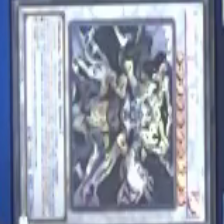

In [113]:
image_real

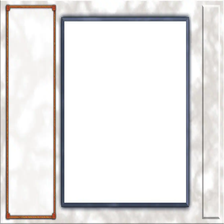

In [114]:
image_gen

In [26]:
dataset = load_dataset("imagefolder", data_dir="datasets/ygoprodeck", split="train", drop_labels=False)

In [32]:
dataset.push_to_hub("HichTala/ygoprodeck-dataset")

Map: 100%|██████████| 13759/13759 [00:01<00:00, 11622.63 examples/s]

Uploading the dataset shards: 100%|██████████| 1/1 [00:32<00:00, 32.21s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/HichTala/ygoprodeck-dataset/commit/3836505080b8175e9258b5b53f79599babbc7c5d', commit_message='Upload dataset', commit_description='', oid='3836505080b8175e9258b5b53f79599babbc7c5d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/HichTala/ygoprodeck-dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='HichTala/ygoprodeck-dataset'), pr_revision=None, pr_num=None)

In [31]:
datasets.config.PARQUET_ROW_GROUP_SIZE_FOR_IMAGE_DATASETS = 20

In [13]:
options = Options()
options.add_argument('--headless')
options.set_capability('goog:loggingPrefs', {'browser': 'ALL'})

In [17]:
driver = webdriver.Chrome(options=options)
driver.set_page_load_timeout(3)
driver.get("https://www.duelingbook.com/deck?id=17502137")
time.sleep(3)

In [19]:
entries = driver.get_log('browser')
entries

[{'level': 'SEVERE',
  'message': "https://www.duelingbook.com/deck?id=17502137 - Access to XMLHttpRequest at 'https://fundingchoicesmessages.google.com/el/AGSKWxUBNQtp0JTpe7ltvOQTTQsst6b6KK9p7H_68_YcXZr_woqjLti-bVVrkvooNKQQd4RVt-kVL5pltaI4Ft8d0OxzyluC7v5V27fainFEz73GtHjpRys-4dpmsa9dfL84o4BBil2--A==' from origin 'https://www.duelingbook.com' has been blocked by CORS policy: No 'Access-Control-Allow-Origin' header is present on the requested resource.",
  'source': 'javascript',
  'timestamp': 1751996327015},
 {'level': 'SEVERE',
  'message': 'https://fundingchoicesmessages.google.com/el/AGSKWxUBNQtp0JTpe7ltvOQTTQsst6b6KK9p7H_68_YcXZr_woqjLti-bVVrkvooNKQQd4RVt-kVL5pltaI4Ft8d0OxzyluC7v5V27fainFEz73GtHjpRys-4dpmsa9dfL84o4BBil2--A== - Failed to load resource: net::ERR_FAILED',
  'source': 'network',
  'timestamp': 1751996327015}]

In [5]:
entry = entries[-1]

In [6]:
def parse_deck_name(console_entry):
    message = console_entry.get('message', '')
    if not message or '\\"action\\":\\"Success\\"' not in message:
        return ''
    pattern = '\\"name\\":\\"'
    start = message.find(pattern) + len(pattern)
    message = message[start:]
    pattern = '\\",'
    end = message.find(pattern)
    message = message[:end]
    return message

In [7]:
parse_deck_name(entry)

''

In [8]:
message = entry.get('message', '')

In [9]:
pattern = '\\"sduhvg\\":\\"'

In [10]:
def get_deck_list(message, dl):
    pattern = '\\"serial_number\\":\\"'
    if pattern not in message:
        return dl
    start = message.find(pattern) + len(pattern)
    message = message[start:]
    pattern = '\\",'
    end = message.find(pattern)
    serial_number = message[:end]
    dl.append(serial_number)

    message = message[end:]
    return get_deck_list(message, dl)

In [11]:
list(set(get_deck_list(message)))

TypeError: get_deck_list() missing 1 required positional argument: 'dl'

In [3]:
with open("cm_card_info.json", "rb") as f:
    cminfo = json.load(f)
with open("cards_sets2.json", "rb") as f:
    card_sets = json.load(f)

output_dict = {}

handled_keys = []

for card in card_sets.keys():
    if card not in output_dict:
        output_dict[card] = []
    for i in range(15):
        key = "-".join(card.split("-")[:-1]) + "-" + str(i) + "-" + card.split("-")[-1]
        if key in cminfo:
            output_dict[card] += cminfo[key]
            handled_keys.append(key)

with open("cm_card_info_formatted.json", "w") as f:
    json.dump(output_dict, f, indent=4)

In [4]:
[k for k in handled_keys if k not in cminfo.keys()]

[]

In [12]:
with open("cm_card_info_formatted.json", "w") as f:
    json.dump(output_dict, f, indent=4)

In [14]:
real_output = {}
for cards in output_dict.keys():
    if output_dict[cards] is not None:
        real_output[cards] = output_dict[cards]

with open("cm_card_info_formatted.json", "w") as f:
    json.dump(real_output, f, indent=4)

In [ ]:
i = 0
last = ""
for subdir, dirs, files in os.walk("datasets/cardmarket/"):
    for dir1 in dirs:
        for dir2 in dirs:
            os.rename(os.path.join(subdir, dir1), os.path.join(subdir, dir1.replace(" ", "-")))
            if "-".join(dir2.split("-")[:-2]).startswith("-".join(dir1.split("-")[:-2])) and "-".join(dir1.split("-")[:-2]) != "-".join(dir2.split("-")[:-2]):
                if last != "-".join(dir1.split("-")[:-2]):
                    print(i, "-".join(dir1.split("-")[:-2]), "-".join(dir2.split("-")[:-2]))
                    last = "-".join(dir1.split("-")[:-2])
                    i += 1

In [128]:
_transforms = A.Compose([
    # Basic resizing / cropping
    A.RandomResizedCrop(size=[224, 224], scale=(0.8, 1.0), ratio=(0.9, 1.1)),

    # Lighting and color jitter
    A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),

    # Geometry
    A.Rotate(limit=(-10, 10)),
    A.Perspective(),

    # Blur / noise
    A.OneOf([
        A.GaussianBlur(),
        A.MotionBlur(),
    ], p=0.3),

    # 🟡 Domain-specific degradations
    A.ImageCompression(quality_range=(50, 100)),  # Random JPEG quality
    # A.RandomShadow(),  # Simulates shadows from hand/objects
    A.RandomSunFlare(src_radius=200, p=0.3),  # Simulated glare

    # To tensor + normalize
    # A.Normalize(mean=image_processor.image_mean, std=image_processor.image_std),
    ToTensorV2(),
])

In [3]:
def transforms(examples, _transforms):
    examples["pixel_values"] = [_transforms(image=np.array(img.convert("RGB"))) for img in examples["image"]]
    del examples["image"]
    return examples

In [4]:
dataset_draw = load_dataset("datasets/ddraw", split="train")

In [5]:
dataset_draw = dataset_draw.train_test_split(test_size=0.2)

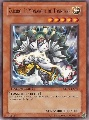

In [6]:
dataset_draw["train"][5642]['image']

In [7]:
dataset_draw = dataset_draw.with_transform(
    lambda x: transforms(x,
        _transforms
    )
)

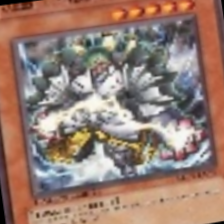

In [182]:
Image.fromarray(dataset_draw["train"][5642]['pixel_values']['image'].permute(1, 2, 0).numpy())